Testing on our task:

In [ ]:
from functools import partial

import numpy as np
import albumentations as A
from fastai.data.transforms import Normalize
from fastai.vision.augment import (
    Resize,
    aug_transforms,
    imagenet_stats,
    RandomResizedCrop,
    RandTransform
)
from tsp_cls.dataloader.augment import AlbumentationsTransform
from fastai.vision.core import PILImage
from fastcore.basics import store_attr

from tsp_cls.utils.root import get_data_root
from tsp_cls.utils.data import (
    get_image_path,
    field_getter,
    read_dataframe,
    sample_dataframe,
)
from tsp_cls.dataloader.dataloader import get_dls

from fastai.vision.all import *

In [ ]:
path = get_data_root()

In [ ]:
df = read_dataframe(path, "SnakeCLEF2021_min-train_metadata_PROD.csv")
df = sample_dataframe(df, "genus", 10)

In [ ]:
print(f"Length of DF: {len(df)}")

Length of DF: 22396


In [ ]:
img_size = 128

def get_train_aug():
    return A.Compose(
        [
            A.RandomResizedCrop(img_size, img_size),
            A.Transpose(p=0.5),
            A.VerticalFlip(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
        ]
    )

def get_valid_aug():
    return A.Compose(
        [A.CenterCrop(img_size, img_size, p=1.0), A.Resize(img_size, img_size)],
        p=1.0,
    )

item_tfms = [Resize(256), AlbumentationsTransform(get_train_aug(), get_valid_aug())]
# item_tfms = [Resize(img_size)]

batch_tfms = Normalize.from_stats(*imagenet_stats)
dls = get_dls(
    df,
    get_x=partial(
        partial(get_image_path, data_path=path), data_path=get_data_root()
    ),
    get_y=partial(field_getter, field="genus"),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=32,
)

print(f"Steps in train_dl: {len(dls.train)}")
print(f"Classes being trained on: {dls.vocab}")

Steps in train_dl: 559
Classes being trained on: ['Agkistrodon', 'Crotalus', 'Lampropeltis', 'Masticophis', 'Micrurus', 'Natrix', 'Nerodia', 'Pantherophis', 'Tantilla', 'Thamnophis']


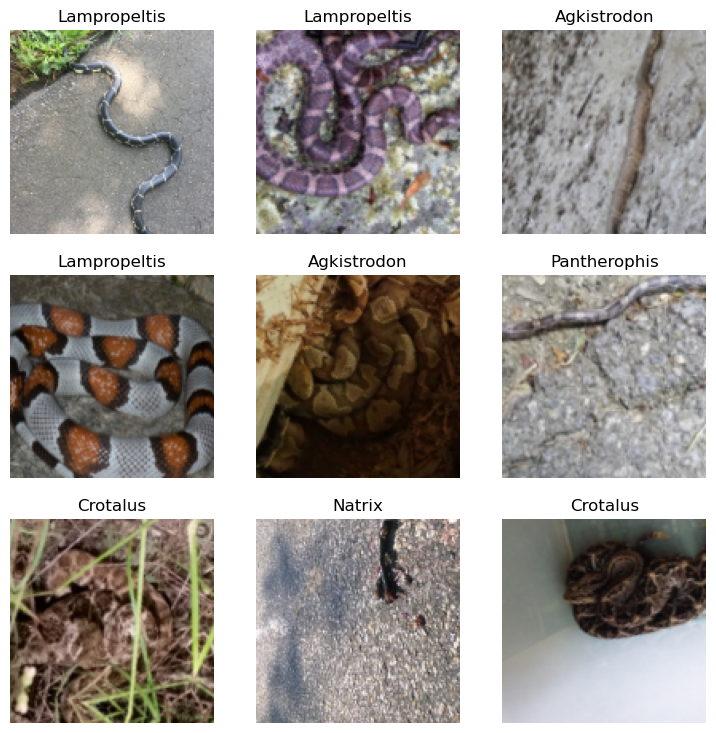

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(
    dls,
    "convnext_tiny",
    metrics=[error_rate, accuracy],
    cbs=[MixedPrecision()],
    wd=0.0,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat()
)

In [ ]:
learn.fine_tune(10, 0.001)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.585624,0.900385,0.307435,0.692565,00:37


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.289410,0.752298,0.259433,0.740567,00:46
1,1.165512,0.715321,0.245367,0.754633,01:02
2,1.004390,0.674723,0.234427,0.765573,00:54
3,0.981958,0.634999,0.216789,0.783211,00:51
4,0.912009,0.606805,0.211654,0.788346,00:57
5,0.853351,0.614851,0.209422,0.790578,00:56
6,0.826175,0.571514,0.198482,0.801518,00:54
7,0.758213,0.564284,0.194463,0.805537,00:58
8,0.748881,0.554157,0.190444,0.809556,00:55
9,0.743794,0.555098,0.189328,0.810672,00:43


In [ ]:
learn.save('prog_resize/128_convnext_tiny')

Path('models/prog_resize/128_convnext_tiny.pth')

In [ ]:
models = Path('models')

In [ ]:
(models/'prog_resize').ls()[0]

Path('models/prog_resize/128_convnext_tiny.pth')

In [ ]:
img_size = 224

def get_train_aug():
    return A.Compose(
        [
            A.RandomResizedCrop(img_size, img_size),
            A.Transpose(p=0.5),
            A.VerticalFlip(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
        ]
    )

def get_valid_aug():
    return A.Compose(
        [A.CenterCrop(img_size, img_size, p=1.0), A.Resize(img_size, img_size)],
        p=1.0,
    )

item_tfms = [Resize(256), AlbumentationsTransform(get_train_aug(), get_valid_aug())]
# item_tfms = [Resize(img_size)]

batch_tfms = Normalize.from_stats(*imagenet_stats)
dls = get_dls(
    df,
    get_x=partial(
        partial(get_image_path, data_path=path), data_path=get_data_root()
    ),
    get_y=partial(field_getter, field="genus"),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=32,
)

print(f"Steps in train_dl: {len(dls.train)}")
print(f"Classes being trained on: {dls.vocab}")


learn2 = vision_learner(
    dls,
    "convnext_tiny",
    metrics=[error_rate, accuracy],
    cbs=[MixedPrecision()],
    wd=0.0,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat()
)

learn2 = learn2.load(file='prog_resize/128_convnext_tiny')

Steps in train_dl: 559
Classes being trained on: ['Agkistrodon', 'Crotalus', 'Lampropeltis', 'Masticophis', 'Micrurus', 'Natrix', 'Nerodia', 'Pantherophis', 'Tantilla', 'Thamnophis']


In [ ]:
learn2.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.692334,0.475353,0.167671,0.832329,01:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.617529,0.451705,0.159411,0.840589,01:27
1,0.655401,0.454266,0.156285,0.843715,01:25
2,0.621551,0.445097,0.155615,0.844385,01:24
3,0.589272,0.443396,0.147801,0.852199,01:24
4,0.593031,0.444263,0.150480,0.849520,01:24
5,0.520560,0.418972,0.137754,0.862246,01:33
6,0.461840,0.419633,0.138870,0.861130,01:36
7,0.489508,0.413149,0.139094,0.860906,01:39
8,0.470833,0.410330,0.135298,0.864702,01:39
9,0.446780,0.405558,0.135075,0.864925,01:39


In [ ]:
learn2.save('prog_resize/224_convnext_tiny')

Path('models/prog_resize/224_convnext_tiny.pth')

In [ ]:
img_size = 384

def get_train_aug():
    return A.Compose(
        [
            A.RandomResizedCrop(img_size, img_size),
            A.Transpose(p=0.5),
            A.VerticalFlip(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
        ]
    )

def get_valid_aug():
    return A.Compose(
        [A.CenterCrop(img_size, img_size, p=1.0), A.Resize(img_size, img_size)],
        p=1.0,
    )

item_tfms = [Resize(400), AlbumentationsTransform(get_train_aug(), get_valid_aug())]
# item_tfms = [Resize(img_size)]

batch_tfms = Normalize.from_stats(*imagenet_stats)
dls = get_dls(
    df,
    get_x=partial(
        partial(get_image_path, data_path=path), data_path=get_data_root()
    ),
    get_y=partial(field_getter, field="genus"),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=32,
)

print(f"Steps in train_dl: {len(dls.train)}")
print(f"Classes being trained on: {dls.vocab}")


learn3 = vision_learner(
    dls,
    "convnext_tiny",
    metrics=[error_rate, accuracy],
    cbs=[MixedPrecision()],
    wd=0.1,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat()
)

learn3 = learn3.load(file='prog_resize/224_convnext_tiny')

Steps in train_dl: 559
Classes being trained on: ['Agkistrodon', 'Crotalus', 'Lampropeltis', 'Masticophis', 'Micrurus', 'Natrix', 'Nerodia', 'Pantherophis', 'Tantilla', 'Thamnophis']


In [ ]:
learn3.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.475266,0.331645,0.110739,0.889261,02:48


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.470793,0.320362,0.111855,0.888145,03:37
1,0.494590,0.319187,0.107390,0.892610,03:33
2,0.455929,0.342554,0.112525,0.887475,03:33
3,0.432518,0.325177,0.107390,0.892610,03:32
4,0.395006,0.312990,0.103595,0.896405,03:31
5,0.378327,0.318953,0.103595,0.896405,03:36
6,0.365181,0.308778,0.100246,0.899754,03:33
7,0.328816,0.309099,0.098459,0.901541,03:36
8,0.341921,0.306545,0.099799,0.900201,03:37
9,0.324913,0.307328,0.098013,0.901987,03:37


In [ ]:
learn3.save('prog_resize/384_convnext_tiny')

Path('models/prog_resize/384_convnext_tiny.pth')

In [ ]:
img_size = 480

def get_train_aug():
    return A.Compose(
        [
            A.RandomResizedCrop(img_size, img_size),
            A.Transpose(p=0.5),
            A.VerticalFlip(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
        ]
    )

def get_valid_aug():
    return A.Compose(
        [A.CenterCrop(img_size, img_size, p=1.0), A.Resize(img_size, img_size)],
        p=1.0,
    )

item_tfms = [Resize(500), AlbumentationsTransform(get_train_aug(), get_valid_aug())]
# item_tfms = [Resize(img_size)]

batch_tfms = Normalize.from_stats(*imagenet_stats)
dls = get_dls(
    df,
    get_x=partial(
        partial(get_image_path, data_path=path), data_path=get_data_root()
    ),
    get_y=partial(field_getter, field="genus"),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=16,
)

print(f"Steps in train_dl: {len(dls.train)}")
print(f"Classes being trained on: {dls.vocab}")


learn4 = vision_learner(
    dls,
    "convnext_tiny",
    metrics=[error_rate, accuracy],
    cbs=[MixedPrecision()],
    wd=0.1,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat()
)

learn4 = learn4.load(file='prog_resize/384_convnext_tiny')

Steps in train_dl: 1119
Classes being trained on: ['Agkistrodon', 'Crotalus', 'Lampropeltis', 'Masticophis', 'Micrurus', 'Natrix', 'Nerodia', 'Pantherophis', 'Tantilla', 'Thamnophis']


In [ ]:
learn4.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.394169,0.312923,0.102255,0.897745,04:15


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.393034,0.295731,0.091538,0.908462,05:31
1,0.435394,0.307731,0.098683,0.901317,05:30
2,0.481710,0.320737,0.102032,0.897968,05:31
3,0.434642,0.318336,0.103595,0.896405,05:34
4,0.431316,0.309229,0.100915,0.899085,05:38
5,0.364682,0.306938,0.094664,0.905336,05:37
6,0.361104,0.300363,0.090422,0.909578,05:44
7,0.302758,0.297698,0.091315,0.908685,05:38
8,0.300134,0.298269,0.090422,0.909578,05:31
9,0.255268,0.298297,0.089529,0.910471,05:31


Some overfitting at this point, we should probably increase the wd parameter.

In [ ]:
learn4.save('prog_resize/480_convnext_tiny')

Path('models/prog_resize/480_convnext_tiny.pth')

Can we go directly?